# Probability and Information Theory 

Probability theory is a mathematical framework for __representing__ uncertain statements. In AI we use probability theory for two main reasons:

* It tells us how AI systems should reason, we design our algorithms to compute or approximate various expressions derived using probability theory. For example, it is likely that it is late in the night if given an image of a landscape the sky looks extremely dark. Thus, for most geographical locations the probability of it being night given a dark sky should be high.

* We can use probability and statistics to theoretically analyze the behaviour of proposed AI systems.

Whilst, probability theory allows us to make uncertain statements and reason in the presence of uncertainty. __Information Theory__ helps us quantify the amount of uncertainty in a probability distribution


## 3.1 Why probability?

The fact that machine learning has to deal with uncertain quantities and at times stochastic (non-deterministic/random) quantities causes it to require probability theory to provide a framework for us to reason about these quantities. In fact, all propositions (except mathematical statements) have some uncertainty arising from:

* Stochasticity of the system being modeled. For example, we can create theoretical scenarios that we postulate to have random dynamics, such as a hypothetical card game where we assume the cards are truly shuffled into a random order.

* Incomplete Observability. Even Deterministic systems can appear stochastic when we cannot observe all the variables that drive the system. For example, in the Monty Hall problem, a game show contestant is asked to choose from three doors. Two doors lead to goats and the third leads to a car. The environment is completely deterministic but the stochasticity comes from the contestant not being able to look behind the doors beforehand.

* Incomplete modeling. When we model a system we discard some information about it which leads to uncertainty in our model's predictions (due to our model being incomplete). For example, suppose we build a robot that can exactly observe the location of every object around it. If the robot discretizes space when predicting the future location of these objects, then this discretization makes the robot uncertain about the precise location of these objects.

In many cases it might be more practical to use a simple but uncertain rule rather than a complex but certain one. This is mostly due to the fact complex rules are harder to develop/maintain and can themselves be brittle/prone to failure. So any additional determinism might not be worth extra effort.

There are two main definitions of probability:

* __Frequentist probability__  sees probability as the long-run expected frequency of occurrence. With the frequentist view $P(A)$ measure the proportion of repetitions we would observe $A$ in were we to repeat an experiment infinitely many times. For example, if we were to throw a fair dice an infinite number of times we would expect to see a three, in $\dfrac{1}{6}$-th of the repetitions. 

* __Bayesian probability__ sees probability as representing a __degree of belief__ with 1 indicating absolute certainty about the occurrence of an event and 0 indicating absolute certainty about the non-occurrence of the event. Thus, if a doctor is $40%$ certain that a patient has the flu, they (the doctor) are their degree of belief that the patient has the flu is 0.4.

Frequentist probability relates to rates at which events occurs whereas Bayesian probability is related to qualitative levels of certainty. However, the same axioms control both approaches (Ramsey 1926).

## 3.2 Random Variables

A __random variable__ is a variable that can take on different values randomly. A random variable is just a description of the states that are possible; it must be coupled with a probability distribution that specifies how likely each of these states are. There are two types of random variables:

* Discrete - Have finite or countably infinite values.
* Continuous - Associated with a real value (by definition uncountably infinite)


## 3.3 probability Distribution

A __probability distribution__ is a description of how likely a random variable or a set of random variables is to take on its possible states. The way we describe a probability distribution depends on whether the random variables are discrete or continuous.

### 3.3.1 Discrete Variables and probability Mass Function

A probability distribution over _discrete random variables_ is described using a __probability mass function__ (PMF) denoted by $P$. The probability that the random variable x takes a value $x$ is denoted by $P(x)$. A probability of 1 indicates that $x$ will certainly take place and 0 indicating that $x$ is impossible. We use ${\rm x} \sim P({\rm x})$ to denote ${\rm x}$ follows the distribution $P({\rm x})$.

The probability mass function can act over many random variables, such a probability mass function is known as a __joint probability distribution__. P({\rm x} = x, {\rm y} = y) denotes the probability that ${\rm x} = x$ and ${\rm {\rm y} = y}$ simultaneously. We use $P(x, y)$ for brevity.

To be a PMF on a random variable ${\rm x}$, a function P must satisfy the following properties:

* The domain of P must be the set of all states of ${\rm x}$.
* $\forall x \in {\rm x}, 0 \le P(x) \le 1$
* $\sum_{x \in {\rm x}} P(x) = 1$. We refer to this property as being __normalized__.

Let's say ${\rm x}$ has k different states. We can place a __uniform distribution__ on ${\rm x}$ such that $\forall x \in {\rm x}, P(x) = \dfrac{1}{k}$.

### 3.3.2 Continuous Variables and Probability Density Functions

A probability distribution over _continuous random variables_ is described using a __probability density function__ (PDF). A PDF, $p$ must satisfy the following properties:

* The domain of $p$ must be the set of all possible states of ${\rm x}$.
* $\forall x \in {\rm x}, p(x) \ge 0$ __Note:__ we do not require $p(x) \le 1$.
* $\int p(x)dx = 1$

__Note:__ The probability of landing inside an infinitesimal region with volume ${\partial x}$ is given by $p(x){\partial x}$. We can integrate over the interval $[a, b]$ to find that probability that $x$ lies in $[a, b]$.

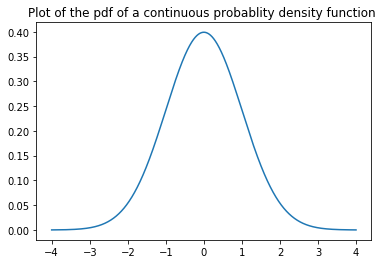

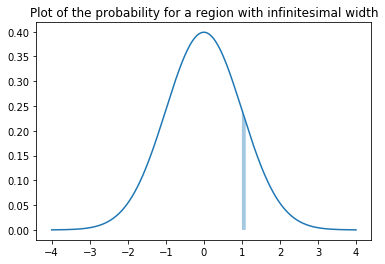

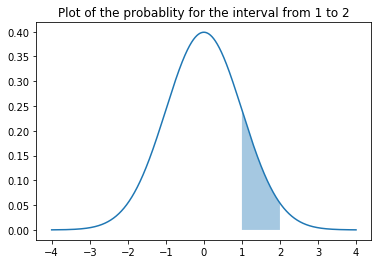

In [57]:
from scipy.stats import norm
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

x = np.arange(-4,4,0.001)
pdf = lambda x: norm.pdf(x)

plt.plot(x, pdf(x))
plt.title('Plot of the pdf of a continuous probablity density function ')
plt.show()


a = 1
# let dx = 0.1
b = 1 + 0.1
interval = np.arange(a, b, 0.001)
# plt.fill(interval, norm.pdf(interval))
plt.plot(x, pdf(x))
plt.fill_between(interval, 0, pdf(interval), alpha = 0.4)
plt.title('Plot of the probability for a region with infinitesimal width')  
plt.show()

a = 1
b = 2
interval = np.arange(a, b, 0.001)
# plt.fill(interval, norm.pdf(interval))
plt.plot(x, pdf(x))
plt.fill_between(interval, 0, pdf(interval), alpha = 0.4)
plt.title('Plot of the probablity for the interval from 1 to 2')  
plt.show()

In the curves above we define a probability distribution and fill in the color blue to show the area under the curve between between a and b. By definition of the area under the curve this corresponds to the integral of the pdf from a to b.

## 3.4 Marginal probability

The probability distribution over a subset of the variables that another known probability distribution is defined over is know as the __marginal probability distribution__. For example, suppose we have a joint probability distribution over discrete random variables ${\rm x}$ and ${\rm y}$ and we already know $P({\rm x}, {\rm y})$. We can find $P({\rm x})$ using the __sum rule__: $P({\rm x} = x) = \sum_{y} P({\rm x} = x, {\rm y} = y)$.

The name marginal distribution comes from the process of computing the marginal probabilities on paper. 

<img src="images/03/marginal-distribution.png" style="float: center;" />

## 3.5 Conditional probability

__Conditional probability__ refers to the probability of one event occurring given that some other even has occurred. Mathematically, it is:

$$
P({\rm x} = x | {\rm y} = y) = \dfrac{P(x, y)}{P(y}
$$

The conditional probability is only defined given that $P(y) \gt 0$. We cannot define conditional probability with respect to an event that can never occur.

## 3.6 The Chain Rule of Conditional Probabilities

Any joint distribution over many variables may be decomposed into conditional probability distributions over one variable:

$$
P({\rm x^{(1)}},...,{\rm x^{(n)}}) = P({\rm x^{(1)}})\prod_{i = 2}^{n} P({\rm x^{(i)}} | {\rm x^{(1)}},...,{\rm x^{(i - 1)}})
$$

The observation is known as the __chain rule__ or __product rule__ of probability. Moreover,

\begin{equation}
P(a, b, c) = P(a | b, c)P(b, c)
\end{equation}

\begin{equation}
P(b, c) = P(b | c)P(c)
\end{equation}

\begin{equation}
P(a, b, c) = P(a | b, c)P(b | c)P(c)
\end{equation}


## 3.7 Independence and Conditional Independence 

Two random variables x and y are __independent__ if their probability distribution can be expressed as a product of two factors, one involving only x and the other only y.

$$
\forall x \in {\rm x}, y \in {\rm y}, p({\rm x} = x, {\rm y} = y) = p({\rm x} = x)p({\rm y} = y)
$$

Similarly two random variables are __conditionally independent__ given a random variable z if the conditional probability distribution over x and z factorizes this way for all values of z

$$
\forall x \in {\rm x}, y \in {\rm y}, z \in {\rm z}, p({\rm x} = x, {\rm y} = y | {\rm z} = z ) = p({\rm x} = x | {\rm z} = z )p({\rm y} = y |{\rm z} = z)
$$


We can denote independence and conditional independence with the notation: ${\rm x} \perp {\rm y}$ and ${\rm x} \perp {\rm y} | {\rm z}$.

## 3.8 Expectation, Variance and Covariance

The __expectation__ or __expected value__ of some function $f(x)$ with respect to a probability distribution $P({\rm x})$ is the average that $f$ taken when $x$ is drawn from P.

$$
\mathbb{E}_{{\rm x} \sim P}[f(x)] = \sum_{x} P(x)f(x)
$$


$$
\mathbb{E}_{{\rm x} \sim p}[f(x)] = \int p(x)f(x)dx.
$$

We tend to simplify the notation and simply write $\mathbb{E}[f(x)]$ and use the context to infer the other details.

Expectation are linear:

$$
\mathbb{E}_x[\alpha f(x) + \beta g(x)] = \alpha\mathbb{E}_x[f(x)] + \beta \mathbb{E}_x[g(x)]
$$

when $\alpha$ and $\beta$ are not dependent on x. 

The __variance__ gives us a measure of how much the values of a function of random variable x vary as we sample different $x$ from its probability distribution.

$$
Var(f(x)) = \mathbb{E}[(f(x) - \mathbb{E}[f(x))^2]
$$

The square of the variance is known as __standard deviation__.

The __covariance__ gives us a sense of how much two values are linearly related to each other, as well as the scale of these variables:

$$
Cov(f(x), g(y)) = \mathbb{E}[(f(x) - \mathbb{E}[f(x)) (g(y) - \mathbb{E}[g(y)])]
$$

High absolute values of covariance indicates that the values change very much and are both far from their respective means at the same time. If the sign of the covariance is positive, then both variables take on relatively high values simultaneously. If the covariance has a negative sign then one variable takes relatively high values when the other variables takes relatively low values or vice versa. __Correlation__ normalizes the contribution of each variable in order to measure only how much the variables are related rather than also being affected by the scale of the separate variables.

__Note:__ Two variables that are independent of each other have zero covariance i.e. independence $\implies$ covariance. The converse however is not true, having zero covariance does not meant that two variables are independent of each other. Covariance measure the linear relationship between two variables whereas independence
encompasses non-linear relationships as well. So if two variables are linearly independent their covariance will be 0 but they might not be independent of each other.

The covariance matrix of a random vector $x \in R^{n}$ is an $n \times n$ matrix, such that $ Cov(x)_{i, j} = Cov(x_i, x_j) $. The diagonal elements of the covariance give the variance of the individual elements.

$$
\pmb{\sum} = \begin{bmatrix}
Var(x_1) & Cov(x_1, x_2) & ... & Cov(x_1, x_n) \\
Cov(x_2, x_1) & Var(x_2) & ... & Cov(x_2, x_n) \\
& . & \\
& . & \\
Cov(x_n, x_1) & Cov(x_n, x_2) & ... & Var(x_n) \\
\end{bmatrix}
$$

## 3.9 Common Probability Distributions

### 3.9.1 Bernoulli Distribution

The __Bernoulli Distribution__ is a distribution over a single binary random variable. It is controlled by a single parameter $\phi \in [0, 1]$. It has the following properties:

\begin{equation*}
P({\rm x} = 1) = \phi
\end{equation*}

\begin{equation*}
P({\rm x} = 0) = 1 - \phi
\end{equation*}

\begin{equation*}
P({\rm x} = x) = \phi^x(1 - \phi)^(1 - x)
\end{equation*}

\begin{equation*}
\mathbb{E}_{\rm x}[{\rm x}] = \phi
\end{equation*}

\begin{equation*}
Var_{\rm x}[{\rm x}] = \phi(1 - \phi)
\end{equation*}

### 3.9.2 Multinoulli Distribution 

The __Multinoulli Distribution__ is a distribution over a single discrete random variable with $k$ different states where $k$ is finite. The multinoulli distribution is parameterized by a vector $p \in [0, 1]^{k - 1}$, where $p_i$ gives the probability of the i-th state. The k-th states probability is $1 - \boldsymbol{1}^T p$, where $\boldsymbol{1}^T p \le 1$.


### 3.9.3 Gaussian Distribution

The most commonly used distribution over the real numbers is the __normal distribution__ aka the __Gaussian Distribution__:

\begin{equation*}
\mathcal{N}(x; \mu, \sigma^2) = \sqrt{\dfrac{1}{2\pi\sigma^2}}\exp(-\dfrac{1}{2\sigma^2}(x - \mu)^2) 
\end{equation*}

The parameters $\mu \in \mathbb{R}$ and $\sigma \in (0, \inf)$ control the normal distribution. $\mu$ is the mean or expectation of the distribution and $\sigma$ is the standard deviation, $\sigma^2$ the variance. We often need to square and invert the value of $\sigma$ so we tend to use the value $\beta$ which is the __precision__ or inverse variance of the distribution to make computations more efficient:

\begin{equation*}
\mathcal{N}(x; \mu, \beta^{-1}) = \sqrt{\dfrac{\beta}{2\pi}}\exp(-\dfrac{\beta}{2}(x - \mu)^2) 
\end{equation*}

We tend to use the normal distribution very often in scenarios where we have very little knowledge of the prior distribution of data because:

* Out of all the possible distributions with the same variance the normal distribution encodes the maximum amount of variance, thus the most uncertainty.
* Many distributions we wish to model are actually close to being normal. Moreover, the central limit theorem says that the sum of many independent random variables is approximately normally distributed.

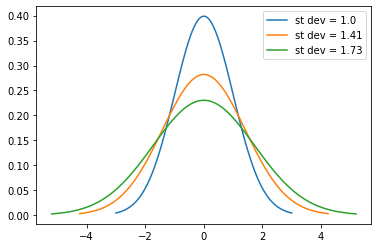

In [58]:
import matplotlib.pyplot as plt
import numpy as np
import math

# This plot shows three normal distributions centered a x = 0 (highest density at this point) and variable standard deviation
# The curves show us that increasing the standard deviation makes the curve more spread out and the peak less pronounced
# when mu = 0 and sigma = 1 we have the standard normal distribution
mu = 0
variances = [1, 2, 3]
sigmas = map(lambda v: math.sqrt(v), variances)
for sigma in sigmas:
    x = np.linspace(mu - 3*sigma, mu + 3*sigma, 100)
    plt.plot(x, norm.pdf(x, mu, sigma), label = f'st dev = {round(sigma, 2)}')
plt.legend()
plt.show()

## 3.11 Bayes' Rule

When we know $P(y | x)$ and need to know $P(x | y)$. If we also know $P(x)$ we can compute $P(x | y)$ using __Bayes' Rule__:

\begin{equation*}
P(x | y) = \dfrac{P(y | x)P(x)}{P{y}}
\end{equation*}

We can compute $P(y)$ using $P(y) = \sum_{x} P(y | x)P(x)$ so we don't need prior knowledge of $P(y)$

## 3.12 Technical Details of Continuous Variables

__Measure Theory__ is a branch of mathematics that helps us develop a formal understanding of continuous random variables and probability. In deep learning, measure theory is more useful for describing theorems that apply to most points in $\mathbb{R}^n$ but don't apply to some corner cases. Measure theory provides a rigorous way of describing that a set of points is negligibly small. Such a set is said to have __measure zero__. A set of measure zero occupies no space in the set we are measuring. Example: A line has measure zero in $\mathbb{R}^2$. Any union of countably many sets that each have measure zero also has measure zero (so the set of all rational numbers has measure zero).

Another useful term from measure theory is __almost everywhere__ A property that holds almost everywhere holds throughout all space except for on a set of measure zero.

Lastly, we might expect that if $\boldsymbol{{\rm x}}$ and $\boldsymbol{{\rm y}}$ such that $y = g(x)$ where g is invertible then we might expect that $p_y(y) = p_x(g^{-1}(x)$ but this is not the case. For example, lets say we have ${\rm x}$ and ${\rm y}$. Suppose $y = \dfrac{x}{2}$ and $x \sim U(0, 1)$. If we use the rule $p_y = p_x(2y)$ then then $p_y$ will be 0 everywhere except the interval $[0, \dfrac{1}{2}]$. But,

$$
\int p_y(y)dy = \dfrac{1}{2}
$$

which of course cannot be a probability distribution since it does not integrate to 1. This is because the approach described above does not take into account the distortion in space caused due to $g$ so the same volume of $x$ in $x$ may have a different volume in $y$. If space gets contracted then we are increasing density and if space gets expanded we are effectively decreasing density. Think of this as squishing a stress ball the total amount of mass in the ball does not change due to the contraction of the ball and the density of the ball is increasing since the same material needs to now occupy a smaller space.

We defined probability for an infinitesimal region for a continuous random variable as $p_x(x)dx$ so it would make sense to us that definition when equating the probabilities for ${\rm x}$ and ${\rm y}$. Thus:

$$
|p_y(y)dy| = |p_x(2y)dx|
$$

$$
p_y(y) = p_x(2y)|\dfrac{\partial x}{\partial y}|
$$

In higher dimensions the derivative generalizes to the determinant of the __Jacobian Matrix__ - $J_{i, j} = \dfrac{\partial x_i}{\partial y_i}$.




The normal distribution generalizes to $\mathbb{R}^n$ as the __multivariate normal distribution__. It may be parameterized with a positive definite symmetric matrix $\boldsymbol{\sum}$:


\begin{equation*}
\mathcal{N}(\boldsymbol{x}; \boldsymbol{\mu}, \boldsymbol{\sum}) = \sqrt{\dfrac{1}{(2\pi)^{n}\det(\boldsymbol{\sum})}}\exp(-\dfrac{1}{2}(\boldsymbol{x} - \boldsymbol{\mu})^T \boldsymbol{\sum}^{-1}(\boldsymbol{x} - \boldsymbol{\mu})
\end{equation*}

Here $\boldsymbol{\mu}$ is still the mean, and $\boldsymbol{\sum}$ is the covariance matrix of the distribution. We can also use the the precision matrix $\boldsymbol{\beta}$ instead of the covariance matrix if we needed to.

### 3.9.4 Exponential and Laplace Distribution

In deep learning we often want to have a probability distribution with a sharp point at x = 0. The exponential distribution provides us with the machinery to be able to do this. We define the distribution as:

$ p(x; \lambda) = \lambda \boldsymbol{1}_{x \ge 0} \exp(-\lambda x) $

A closely related distribution probability distribution that allows to place a sharp peak of probability mass at an arbitrary point $\mu$ is the __Laplace Distribution__

$ Laplace(x; \mu, \gamma) = \dfrac{1}{2\gamma} \exp(-\dfrac{|x - \mu|}{\gamma}) $

Laplace Distribution:
<img src="images/03/laplace-distribution.png" />


### 3.9.5 The Dirac Distribution and the Empirical Distribution

In some cases we wish to specify that all mass in a probability distribution clusters around a single point. This can be accomplished using a PDF using the __Dirac delta function__:

$ p(x) = \delta(x - \mu)$

This p(x) will be such that it will be 0 valued everywhere except at $ x = \mu $. It will still integrate to 1.

<img src="images/03/dirac-delta-distribution.png" />

A common use of the Dirac delta function distribution is as a component of an __empirical distribution__:

\begin{equation*}
\hat{p}(\boldsymbol{x}) = \dfrac{1}{m}\sum_{i = 1}^{m}\delta(\boldsymbol{x} - \boldsymbol{x}^{(i)})
\end{equation*}

This distribution puts a mass of $\dfrac{1}{m}$ on each of the points $\boldsymbol{x}^{(i)}$. The Dirac delta distribution is only needed to define the empirical distribution in the continuous case (can use multinoulli in discrete case).

### 3.9.6 Mixture of Distributions

A __mixture distribution__ is simply a combination of simpler probability distributions. One each trial which component distribution should generate the sample is determined by sampling a component identity from a multinoulli distribution:

\begin{equation*}
P({\rm x}) = \sum_{i} P(c = i) P({\rm x} | c = i)
\end{equation*}

Empirical Distribution is a mixture over Dirac delta distributions. The component identity variable $c$ in our definition of a mixture distribution is an example of a __latent variable__. It is a random variable that we cannot observe directly. The relationship between the latent variables and the visible variables determines our distribution (Discussed further in chapter 16).

A __Gaussian Mixture Model__ is a model in which each component distribution is a gaussian. The parameters of the GMM define the means and covariance matrices of the model along with the __prior probability__ that $P(c = i)$. We define this _prior_ prior to observing any samples from the distribution. Whereas, $P(c | x)$ is the __posterior probability__, because it computed after observing the sample $x$.  A GMM is a __universal approximator__  of densities (any smooth density can be approximated with any specific non-zero amount of error by a GMM.


## 3.10 Useful Properties of Common Functions

Functions that arise while working with probability distributions within deep learning:

* Logistic Sigmoud: $ \sigma(x) = \dfrac{1}{1 + \exp(-x)}$ - Use to produce the parameter $\phi$ of a bernoulli distribution.


* Softplus function: $ \varsigma(x) = \log(1 + \exp(x)) $. The softplus function can be useful for producing the $\beta$ and $\sigma$ of a normal distribution. It is a smooth version of $x^+ = max(0, x)$

Let's try to plot these values in the code cell below: 

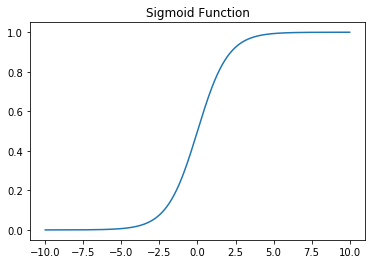

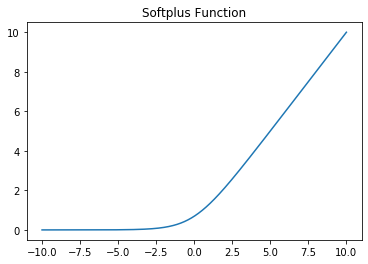

In [54]:
def sigmoid(x):
    return 1/(1 + np.exp(-x))

def softplus(x):
    return np.log(1 + np.exp(x))

x = np.arange(-10, 10, 0.001)
sig_y = sigmoid(x)
soft_y = softplus(x)

plt.plot(x, sig_y)
plt.title('Sigmoid Function')
plt.show()

plt.plot(x, soft_y)
plt.title('Softplus Function')
plt.show()

The following are interesting properties of the two functions above

* $\sigma(x) = \dfrac{\exp(x)}{\exp(x) + \exp(0)}$
* $\dfrac{d\sigma(x)}{dx} = \sigma(x)(1 - \sigma(x))$
* $1 - \sigma(x) = \sigma(-x)$
* $log \sigma(x) =  -\varsigma(-x)$
* $\dfrac{d\varsigma(x)}{dx} = \sigma(x)$ 
* $\forall x \in (0, 1), \sigma^{-1}(x)  = log(\dfrac{x}{1 - x})$
* $\forall x \ge 0, \varsigma^{-1}(x)  = log(\exp(x) - 1)$
* $\varsigma(x) = \int_{-\infty}^{x}\sigma(y) dy$
* $\varsigma(x) - \varsigma(-x) = x$

The function $\sigma^{-1}(x)$ is called the __logit__ in statistics.

## 3.13 Information Theory

Information Theory is a branch of applied math that deals with quantifying how much information is present in a signal. It was originally developed to study sending messages from discrete alphabets over a noisy channel. 

The basic intuition behind information theory is that learning that an unlikely even has occurred is more informative than learning that a likely even has occurred. We would like to quantify information in a way that formalizes this intuition:

* Likely events should have low information content.

* Less likely events should have higher information content.

* Independent events should have additive information.

To satisfy these properties we define the self-information of an event ${\rm x} = x$ to be:

$$
I(x) = -log(P(x))
$$

If the log has a base $e$ then our definition of $I(x)$ is written in terms or __nats__. One nat is the amount of information gained by observing an event of probability $\dfrac{1}{e}$. When we use base 2 then our units are __bits__ or __shannons__. There two units are related to each other by a rescaling factor, 1 nat = 1.44 bits/shannons. We use the same formation of information for the continuous random variables although some of the properties from discrete random variables is lost. An event with unit density has 0 zero information despite not being guaranteed to occur (since the pdf of a continuous variable can be greater than 1). 

When dealing with the quantification of uncertainty in an entire probability distribution we use the __Shannon Entropy__:

$$
H(x) = \mathbb{E}_{{\rm x} \sim P}I(x) = -\mathbb{E}_{{\rm x} \sim P}\log P(x)
$$

Shannon Entropy of a distribution is the expected amount of information in an event drawn from the distribution. When ${\rm x}$ is continuous Shannon Entropy is known as __differential entropy__. We depict a graph of Shannon entropy in the code cell below.




/Users/shreyashpatodia/anaconda3/envs/ml-basics/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in log
  
/Users/shreyashpatodia/anaconda3/envs/ml-basics/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in multiply
  


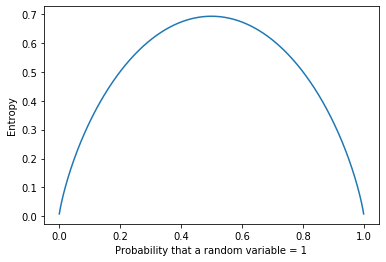

In [55]:
def shannon_entropy(p):
    return -p * np.log(p) - (1 - p) * np.log(1 - p)

ps = np.arange(0, 1, 0.001)
entropies = shannon_entropy(ps)
plt.plot(ps, entropies)
plt.xlabel('Probability that a random variable = 1')
plt.ylabel('Entropy')
plt.show()


As we can see from the code cell above. Entropy is lowest when we have certainty about the likely value of a random variable and highest when we don't (at $p = 0.5$).

The __Kullback-Leibler (KL) divergence__ is a technique we can use to measure how different two distributions $P(x)$ and $Q(x)$ are:

$$
D_{KL}(P||Q) = \mathbb{E}_{{\rm x} \sim P}\left[\log\dfrac{P(x)}{Q(x)}\right] = \mathbb{E}_{{\rm x} \sim P}\left[\log P(x) - \log Q(x)\right]
$$

In the case of discrete variables, it could be thought of as the amount of extra information (bits/nats) needed to send a message containing symbols drawn from a probability distribution $P$, when we use a code that was designed to minimize the length of messages drawn from probability distribution $Q$.

* The KL Divergence is non-negative.
* It is not a distance metric since it is not symmetric $D_{KL}(P||Q) \neq D_{KL}(Q||P)$

The plot below shows the effect of maximizing each of the the two variants of KL-Divergence to find the best Q given P.

Computing results for mu = -10.0 and sigma = 10.0
Computing results for mu = -8.0 and sigma = 10.0
Computing results for mu = -6.0 and sigma = 10.0
Computing results for mu = -4.0 and sigma = 10.0
Computing results for mu = -2.0 and sigma = 10.0
Computing results for mu = 0.0 and sigma = 10.0
Computing results for mu = 2.0 and sigma = 10.0
Computing results for mu = 4.0 and sigma = 10.0
Computing results for mu = 6.0 and sigma = 10.0
Computing results for mu = 8.0 and sigma = 10.0
Computing results for mu = 10.0 and sigma = 10.0


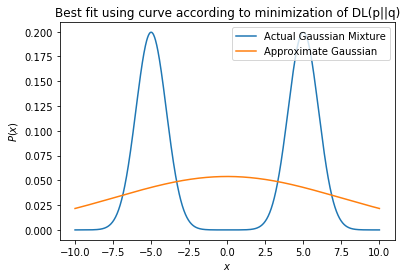

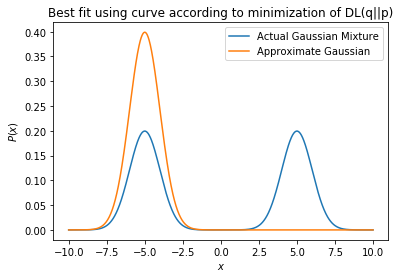

In [56]:
import matplotlib.pyplot as plt
from scipy.stats import entropy
import numpy as np

# Defining a gaussian mixture of two normal distributions
x = np.linspace(-10, 10, 1000)
# -2.5 is mu and 1 is sigma
y1 = norm.pdf(x, -5, 1)
y2 = norm.pdf(x, 5, 1)
p = np.sum([y1, y2], axis=0)/2

best_pq = float('inf')
best_pq_distribution = None
best_qp = float('inf')
best_qp_distribution = None
for mu_mult in range(-1000, 1001):
    mu = mu_mult / 100
    for sigma_mult in range(1, 101):
        sigma = sigma_mult / 10
        y_test = norm.pdf(x, mu, sigma)
        pq = entropy(p, y_test)
        qp = entropy(y_test, p)
        if mu_mult % 200 == 0 and sigma_mult % 100 == 0:
            print(f'Computing results for mu = {mu} and sigma = {sigma}')
        # print(mu_factor)
        if pq < best_pq:
            best_pq = pq
            best_pq_distribution = y_test
        if qp < best_qp:
            best_qp = qp
            best_qp_distribution = y_test

            
# best fit using curve according to minimization of DL(p||q)
plt.plot(x, y, '-', label = 'Actual Gaussian Mixture')
plt.plot(x, best_pq_distribution, label = 'Approximate Gaussian')
plt.xlabel('$x$')
plt.ylabel('$P(x)$')
plt.title('Best fit using curve according to minimization of DL(p||q)')
plt.legend(loc='upper right')
plt.show()

# best fit using curve according to minimization of DL(q||p)
plt.plot(x, y, '-', label = 'Actual Gaussian Mixture')
plt.plot(x, best_qp_distribution, label = 'Approximate Gaussian')
plt.xlabel('$x$')
plt.ylabel('$P(x)$')
plt.title('Best fit using curve according to minimization of DL(q||p)')
plt.legend(loc='upper right')
plt.show()

When we use $D(p||q)$ then we tend to choose a Gaussian that blurs the different peaks that we have in order to assign a high probability mass to all of them. In the other one, $D(q||p)$ we choose a q that has a low probability whenever p has a low probability.

A quantity closesly related to KL Divergence is __cross entropy__: $H(P, Q) = H(P) + D_{KL}(P||Q) = -\mathbb{E}_{{\rm x} \sim P} \log Q(x)$. As we can see it is similar to KL Divergence but lacking the term on the left. Minimizing the cross entropy and the KL divergence with respect to Q are equivalent since Q does not participate in the omitted term. 

We define $\lim_{x \to 0} x \log x = 0$ and us this limit when we counter $0\log 0$

## 3.14 Structured Probabilistic Models

Machine Learning algorithms involve probability distributions with a large number of random variables. But very few of these random variables directly interact with each other. In this case instead of using a single function to represent a probability distribution we split a probability distribution into many factors that we multiply together. Let's say we have random variables: a, b, c such that a influences b, b influences c, but that a and c are independent given b. We can represent $p(a, b, c)$ as $p(a)p(b | a)p(c | b)$. These factorizations allow us to greatly remove the number of parameters if we can find factorizations into distributions over fewer variables (since each factor is exponential in the number of variables involved). We describe these sorts of factorizations using graphs and call such a model a __structured probabilistic model__ or __graphical model__. There are two main types of graphical models:

* __Directed Models__ - use directed edges. A directed model decomposes using conditional probabilities such that we take a factor for each random variable:

$$
p(\boldsymbol{\rm x}) = \prod_i p(x_i | P_{a\mathcal{G}}(x_i)
$$

where $\mathcal{G}$ is the graph and P is a function that represent the parents of an element in the graph.

<img src="images/03/directed-models.png" />

* __Undirected Models__ - use undirected edges. These represent factorization into a set of functions (which are usually not probability distributions of any kind). Any set of nodes that are connected to each other is called a clique. Each clique $\mathcal{C}$ in an undirected model is associated with a factor $\phi^{(i)}(\mathcal[C}^{(i)}$. The output of each factor must be non-negative. The probability of a configuration is proportional to the product of all these factor divided by a normalizing factor $Z$:

$$
p(x) = \dfrac{1}{Z} \prod_i \phi^{(i)}(\mathcal{C}^{(i)})
$$

<img src="images/03/undirected-models.png" />

The description of a probability distribution using a directed or undirected graph does not have anything to do with the probability distribution, and is not a property of the distribution itself. 